<a href="https://colab.research.google.com/github/sunandhini96/ERA_Session5/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cloning the repository from our github repo

# Installation

# cloning the repository

In [1]:
!git clone https://github.com/sunandhini96/ERA_Session5.git

fatal: destination path 'ERA_Session5' already exists and is not an empty directory.


In [2]:
cd "/content/ERA_Session5"

/content/ERA_Session5


In [3]:
pwd


'/content/ERA_Session5'

In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#import model

In [ ]:
#import utils

In [6]:
!python model.py

In [7]:
!python utils.py

In [9]:
from model import *
from utils import *

In [10]:
# Checking cuda availability
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


# printing the train data images with labels

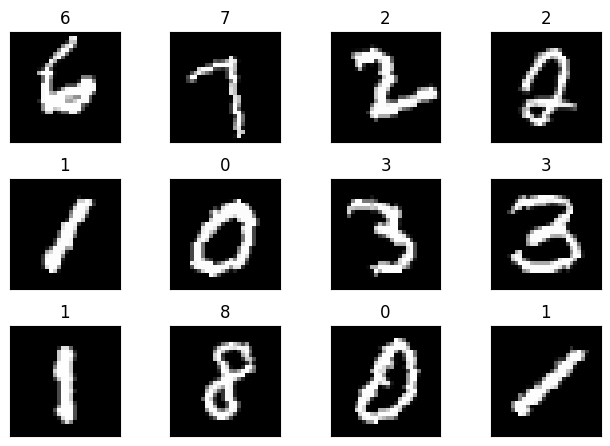

In [11]:
#import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

# calling the model function and printing the summary

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


# Training and Testing the model

In [13]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  scheduler.step()
  test(model, device, test_loader)
  

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.4625 Batch_id=117 Accuracy=30.55: 100%|██████████| 118/118 [00:25<00:00,  4.57it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 1.2455, Accuracy: 6505/10000 (65.05%)

Epoch 2


Train: Loss=0.1609 Batch_id=117 Accuracy=87.63: 100%|██████████| 118/118 [00:27<00:00,  4.32it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.1237, Accuracy: 9643/10000 (96.43%)

Epoch 3


Train: Loss=0.0895 Batch_id=117 Accuracy=95.38: 100%|██████████| 118/118 [00:26<00:00,  4.44it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.1038, Accuracy: 9659/10000 (96.59%)

Epoch 4


Train: Loss=0.0382 Batch_id=117 Accuracy=96.52: 100%|██████████| 118/118 [00:26<00:00,  4.47it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0576, Accuracy: 9820/10000 (98.20%)

Epoch 5


Train: Loss=0.0436 Batch_id=117 Accuracy=97.33: 100%|██████████| 118/118 [00:26<00:00,  4.40it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0446, Accuracy: 9861/10000 (98.61%)

Epoch 6


Train: Loss=0.0791 Batch_id=117 Accuracy=97.61: 100%|██████████| 118/118 [00:26<00:00,  4.47it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0400, Accuracy: 9870/10000 (98.70%)

Epoch 7


Train: Loss=0.0644 Batch_id=117 Accuracy=97.86: 100%|██████████| 118/118 [00:26<00:00,  4.49it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0400, Accuracy: 9871/10000 (98.71%)

Epoch 8


Train: Loss=0.0294 Batch_id=117 Accuracy=98.10: 100%|██████████| 118/118 [00:26<00:00,  4.46it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0306, Accuracy: 9904/10000 (99.04%)

Epoch 9


Train: Loss=0.0141 Batch_id=117 Accuracy=98.21: 100%|██████████| 118/118 [00:26<00:00,  4.48it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0314, Accuracy: 9900/10000 (99.00%)

Epoch 10


Train: Loss=0.0865 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:26<00:00,  4.41it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0291, Accuracy: 9911/10000 (99.11%)

Epoch 11


Train: Loss=0.0171 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:26<00:00,  4.44it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0326, Accuracy: 9895/10000 (98.95%)

Epoch 12


Train: Loss=0.0120 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [00:26<00:00,  4.52it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0405, Accuracy: 9879/10000 (98.79%)

Epoch 13


Train: Loss=0.0158 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:26<00:00,  4.43it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0280, Accuracy: 9902/10000 (99.02%)

Epoch 14


Train: Loss=0.0092 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:26<00:00,  4.46it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0257, Accuracy: 9912/10000 (99.12%)

Epoch 15


Train: Loss=0.0077 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:26<00:00,  4.46it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0230, Accuracy: 9923/10000 (99.23%)

Epoch 16


Train: Loss=0.0064 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:25<00:00,  4.61it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0206, Accuracy: 9925/10000 (99.25%)

Epoch 17


Train: Loss=0.0245 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:25<00:00,  4.57it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0198, Accuracy: 9934/10000 (99.34%)

Epoch 18


Train: Loss=0.0329 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:25<00:00,  4.65it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0200, Accuracy: 9934/10000 (99.34%)

Epoch 19


Train: Loss=0.0281 Batch_id=117 Accuracy=99.04: 100%|██████████| 118/118 [00:25<00:00,  4.71it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0200, Accuracy: 9930/10000 (99.30%)

Epoch 20


Train: Loss=0.0342 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0199, Accuracy: 9931/10000 (99.31%)



# plotting

Text(0.5, 1.0, 'Test Accuracy')

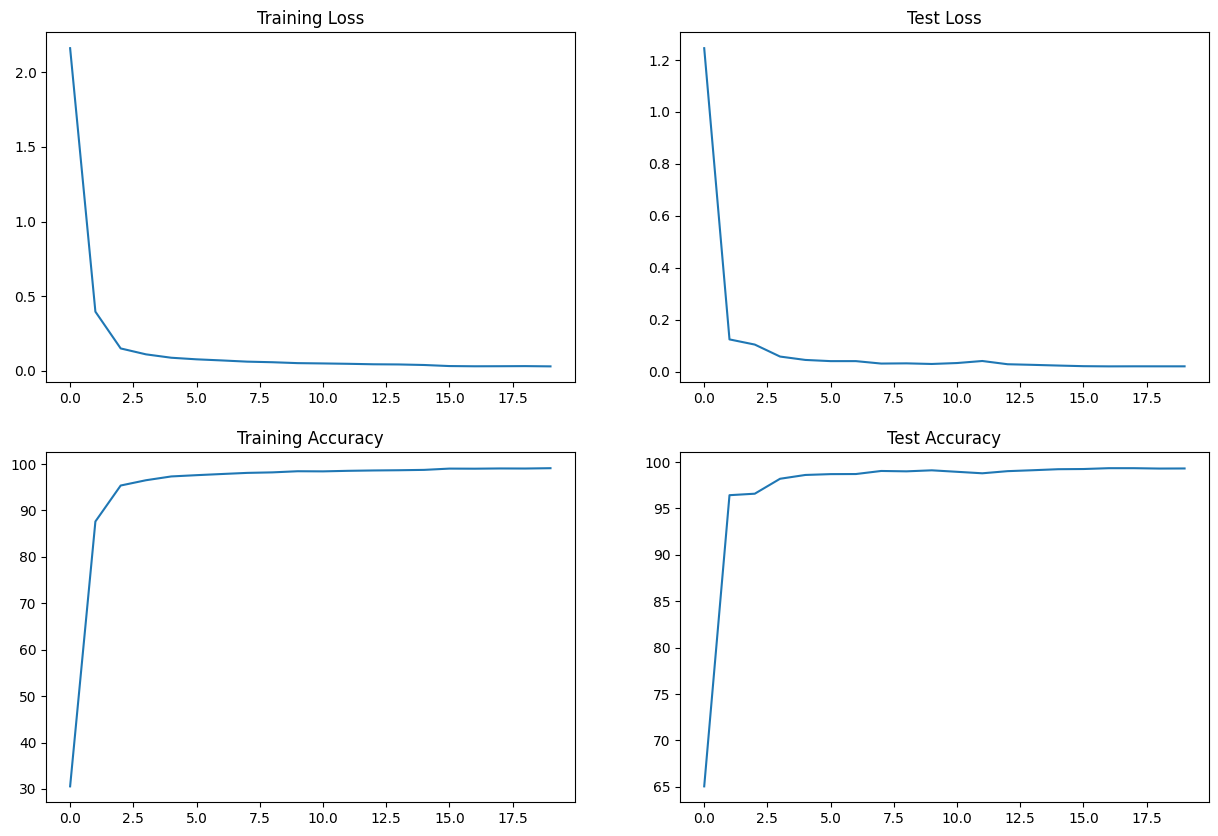

In [14]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")